In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df1 = pd.DataFrame({"A전자" : [10000000, 0.75],
                   'B건설': [5000000, 0.9],
                   'C증권': [20000000, 0.82],
                   'D화학': [1000000, 0.88],
                   'E엔터': [1000000, 0.5]},
                  index=['상장주식수', '유동비율'])

In [3]:
df1

,A전자,B건설,C증권,D화학,E엔터
상장주식수,10000000.00,5000000.0,20000000.00,1000000.00,1000000.0
유동비율,0.75,0.9,0.82,0.88,0.5


In [4]:
dic = {'A전자':[10000],
      'B건설':[20000],
      'C증권' : [30000],
      'D화학' : [100000],
      'E엔터' : [1000000]}

In [5]:
for value in dic.values():
    for i in range(251):
        next_price = round((value[i] * random.uniform(0.97, 1.033)), 1)
        value.append(next_price)

In [6]:
df2 = pd.DataFrame(dic)

In [7]:
df3 = df1.iloc[0] * df1.iloc[1] * df2

In [8]:
df3['시가총액'] = df3.sum(axis=1)

In [9]:
df3['지수'] = df3['시가총액'] / df3['시가총액'].iloc[0] * 100

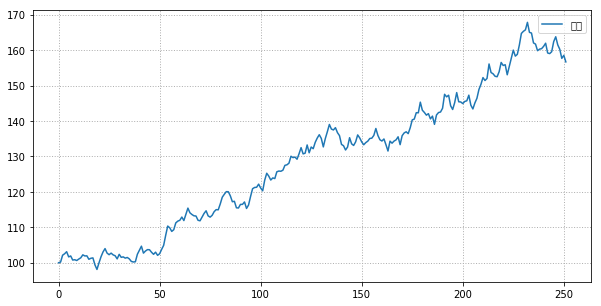

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(df3['지수'])
plt.grid(True, linestyle=':', linewidth=1)
plt.legend()

In [43]:
df4 = pd.DataFrame({'일자':list(range(1, 253)),
                    '지수' : df3['지수']})

In [44]:
r = 0.025
d = 0.015
mat = [63, 126, 189, 252]

In [45]:
df4.index = df4['일자']

In [48]:
df4['이론가격'] = df4['지수'] * (1 + (r-d)*((252-df4['일자'])/252))

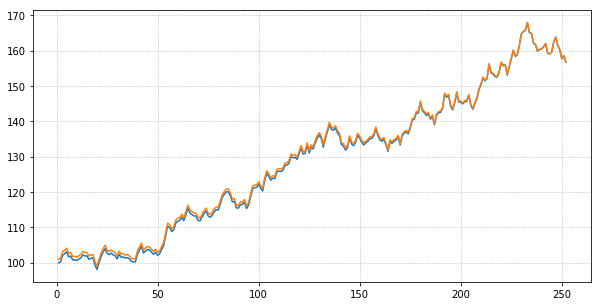

In [50]:
plt.figure(figsize=(10,5))
plt.plot(df4['지수'])
plt.plot(df4['이론가격'])
plt.grid(True, linestyle=':')